# EDA
### Exploratory Data Analysis
##### 모델링 전에 선행되어야 하는 과정으로 수집된 데이터를 분석 전에 관찰하고 이해하는 과정

In [1]:
import numpy as np
import pandas as pd

import os

import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [17]:
#from IPyhon.display import set_matplotlib_formats
#set_matplotlib_formats("retina")

In [2]:
plt.style.use("seaborn-whitegrid")

In [3]:
kaggle2020 = pd.read_csv('kaggle_survey_2020_responses.csv', low_memory = False)

In [4]:
kaggle2020.shape

(20037, 355)

In [5]:
kaggle2020.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
question = kaggle2020.iloc[0]
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [7]:
answer = kaggle2020.drop([0])
answer

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


## 📌 질문1

### Q1 나이 (# years)?

In [8]:
question["Q1"]

'What is your age (# years)?'

In [9]:
Q1 = answer["Q1"].value_counts().sort_index()
Q1

18-21    3469
22-24    3786
25-29    4011
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

Text(0.5, 1.0, 'What is your age (# years)?')

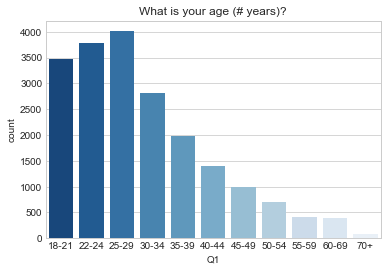

In [13]:
# seaborn as sns ; 데이터 시각화 위한 python 라이브러리
sns.countplot(data = answer.sort_values("Q1"), x = "Q1", palette="Blues_r").set_title(question["Q1"])

## 📌 질문2

### Q2 성별 - Selected Choice

In [70]:
question["Q2"]

'What is your gender? - Selected Choice'

In [72]:
Q2 = answer["Q2"].value_counts()
Q2

Man                        15789
Woman                       3878
Prefer not to say            263
Prefer to self-describe       54
Nonbinary                     52
Name: Q2, dtype: int64

Text(0.5, 1.0, 'What is your gender? - Selected Choice')

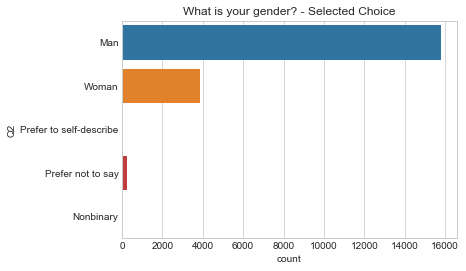

In [74]:
sns.countplot(data = answer, y = "Q2").set_title(question["Q2"])

### 📊 질문1(나이) + 질문2(성별)

<AxesSubplot:xlabel='Q1'>

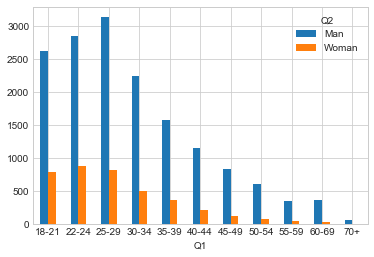

In [80]:
# Q1 => age
# Q2 => gender
Q1_Q2 = pd.crosstab(answer["Q1"], answer["Q2"])
Q1_Q2[["Man", "Woman"]].plot.bar(rot = 0)

<AxesSubplot:title={'center':'Age & Gender'}, ylabel='Q1'>

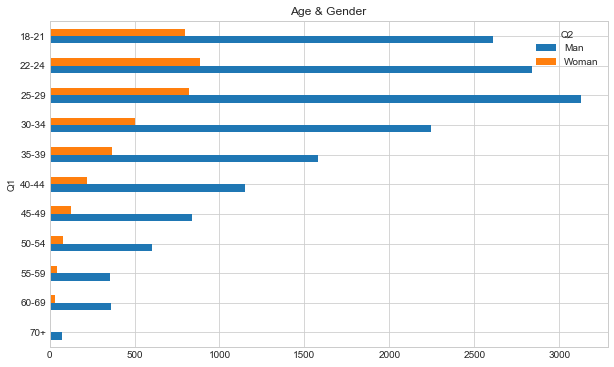

In [83]:
# 나이 낮은 순부터 표시
Q1_Q2[["Man", "Woman"]].sort_index(ascending = False).plot.barh(figsize = (10,6), title = "Age & Gender")

#### other 포함

Text(0.5, 1.0, 'Age & Gender')

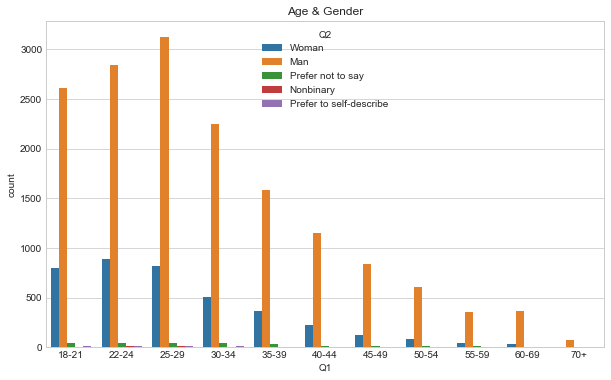

In [85]:
plt.figure(figsize = (10, 6))
sns.countplot(data = answer.sort_values("Q1"), x = "Q1", hue = "Q2").set_title("Age & Gender")

## 📌 질문3

### Q3 현재 거주 국가

In [95]:
question["Q3"]

'In which country do you currently reside?'

#### 🔍 show_countplot_by_qno 함수 정의

In [90]:
# qno => question_number
# fsize => figsize default (10, 6)
# order => optional order list, default value_counts().index

def show_countplot_by_qno(qno, fsize = (10, 6), order = None):
    if not order:
        order = answer[qno].value_counts().index
        
    plt.figure(figsize = fsize)
    sns.countplot(data = answer, y = qno, order = order, palette = "Blues_r").set_title(question[qno])

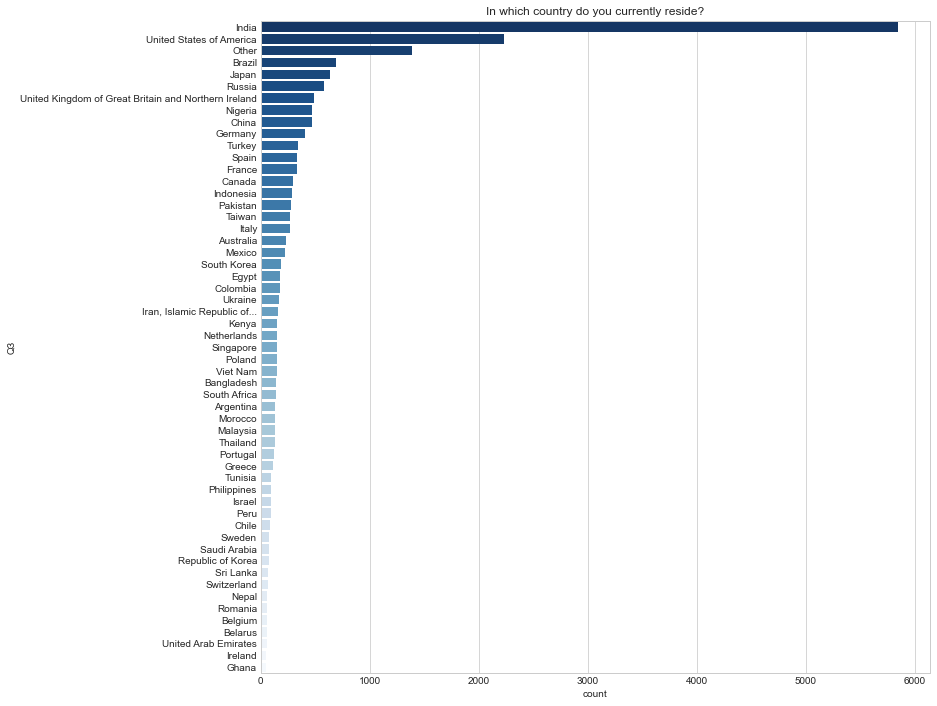

In [88]:
show_countplot_by_qno("Q3", fsize = (12, 12))

## 📌 질문4

### Q4 향후 2년간 계획중인 정규 교육 수준

In [96]:
question["Q4"]

'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'

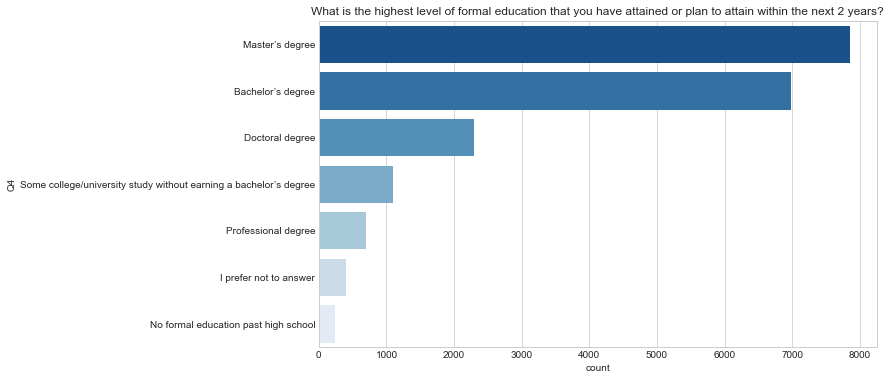

In [91]:
show_countplot_by_qno("Q4")

## 📌 질문5

### Q5 현재 직업

In [97]:
question["Q5"]

'Select the title most similar to your current role (or most recent title if retired): - Selected Choice'

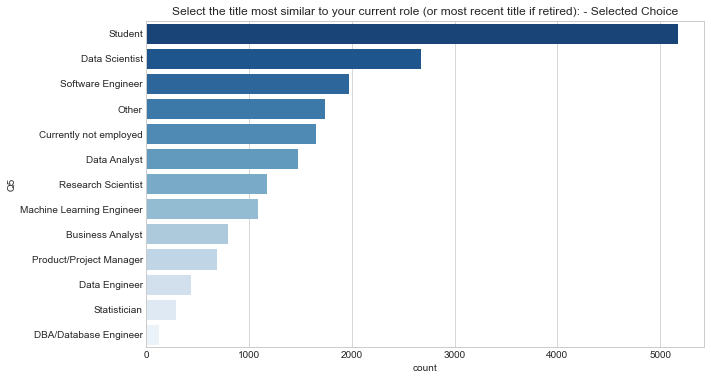

In [92]:
show_countplot_by_qno("Q5")

## 📌 질문6

### Q6 프로그래밍 사용 기간

In [98]:
question["Q6"]

'For how many years have you been writing code and/or programming?'

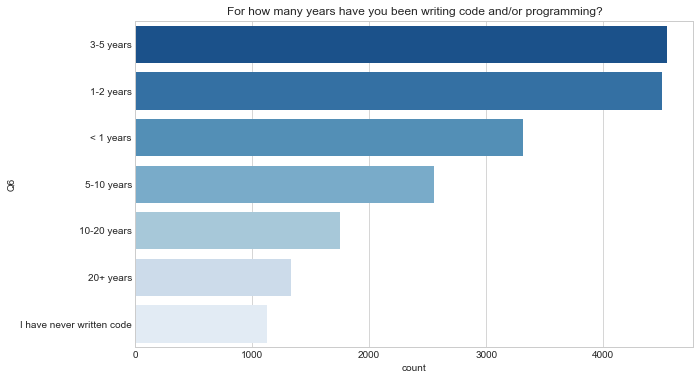

In [94]:
show_countplot_by_qno("Q6")

## 📌 질문7

### Q7 사용 프로그래밍 언어 (복수 응답 가능)

In [107]:
#question["Q7"]
get_question_title_by_qno("Q7")

'What programming languages do you use on a regular basis? (Select all that apply) '

#### pandas filter & describe

In [29]:
question.iloc[7:20]

Q7_Part_1     What programming languages do you use on a reg...
Q7_Part_2     What programming languages do you use on a reg...
Q7_Part_3     What programming languages do you use on a reg...
Q7_Part_4     What programming languages do you use on a reg...
Q7_Part_5     What programming languages do you use on a reg...
Q7_Part_6     What programming languages do you use on a reg...
Q7_Part_7     What programming languages do you use on a reg...
Q7_Part_8     What programming languages do you use on a reg...
Q7_Part_9     What programming languages do you use on a reg...
Q7_Part_10    What programming languages do you use on a reg...
Q7_Part_11    What programming languages do you use on a reg...
Q7_Part_12    What programming languages do you use on a reg...
Q7_OTHER      What programming languages do you use on a reg...
Name: 0, dtype: object

In [32]:
#question.filter(regex="Q7")[0]
question.filter(regex="Q7")[0].split("-")[0]

'What programming languages do you use on a regular basis? (Select all that apply) '

In [38]:
answer_Q7 = answer.filter(regex="Q7")
answer_Q7

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
1,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other
2,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
4,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN
5,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,Python,NaN,SQL,C,NaN,Java,Javascript,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
answer_Q7_desc = answer_Q7.describe()
answer_Q7_desc

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
count,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945
unique,1,1,1,1,1,1,1,1,1,1,1,1,1
top,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
freq,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945


In [48]:
answer_Q7_count = answer_Q7_desc.loc[["top", "count"]].T
answer_Q7_count

,top,count
Q7_Part_1,Python,15530
Q7_Part_2,R,4277
Q7_Part_3,SQL,7535
Q7_Part_4,C,3315
Q7_Part_5,C++,3827
Q7_Part_6,Java,3367
Q7_Part_7,Javascript,2995
Q7_Part_8,Julia,262
Q7_Part_9,Swift,198
Q7_Part_10,Bash,1776


In [50]:
answer_Q7_count = answer_Q7_count.set_index("top")
answer_Q7_count

,count
top,
Python,15530
R,4277
SQL,7535
C,3315
C++,3827
Java,3367
Javascript,2995
Julia,262
Swift,198


In [51]:
answer_Q7_count = answer_Q7_count.sort_values("count", ascending=False)
answer_Q7_count

,count
top,
Python,15530
SQL,7535
R,4277
C++,3827
Java,3367
C,3315
Javascript,2995
MATLAB,2217
Other,1945


### 7번 질문 복수응답 처리

In [62]:
Q7_title = question.filter(regex="Q7")[0].split("-")[0]
Q7_title

'What programming languages do you use on a regular basis? (Select all that apply) '

Text(0.5, 1.0, 'What programming languages do you use on a regular basis? (Select all that apply) ')

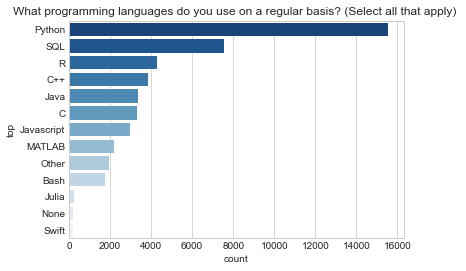

In [63]:
sns.barplot(data = answer_Q7_count, x = "count", y = answer_Q7_count.index, palette = "Blues_r").set_title(Q7_title)

### get_question_title 함수 정의

In [105]:
def get_question_title_by_qno(qno):
    if qno in question.index:
        return question[qno]
    else:
        q_no = question.filter(regex = qno)[0].split("-")[0]
        return q_no

In [109]:
get_question_title_by_qno("Q7")

'What programming languages do you use on a regular basis? (Select all that apply) '

### get_multiple_choice_answer 함수 정의

In [108]:
def get_multiple_choice_answer_by_qno(qno):
    df_answer = answer.filter(regex = qno)
    answer_desc = df_answer.describe()
    answer_count = answer_desc.loc[["top", "count"]].T.set_index("top")
    answer_count = answer_count.sort_values(by = "count",ascending = False)
    return answer_count

In [111]:
get_multiple_choice_answer_by_qno("Q7")

,count
top,
Python,15530
SQL,7535
R,4277
C++,3827
Java,3367
C,3315
Javascript,2995
MATLAB,2217
Other,1945


In [112]:
# 9번 질문 복수 응답 처리
get_multiple_choice_answer_by_qno("Q9")

,count
top,
"Jupyter (JupyterLab, Jupyter Notebooks, etc)",11211
Visual Studio Code (VSCode),5873
PyCharm,5099
RStudio,3826
Spyder,3290
Notepad++,3132
Sublime Text,2452
Visual Studio,2445
MATLAB,1604


### show_multiple_choice_bar_plot_by_qno 함수 정의

In [115]:
def show_multiple_choice_bar_plot_by_qno(qno):
    multiple_choice_answer = get_multiple_choice_answer_by_qno(qno)
    
    plt.figure(figsize = (10, 6))
    sns.barplot(data = multiple_choice_answer, x = "count", y = multiple_choice_answer.index, palette = "Blues_r").set_title(get_question_title_by_qno(qno))

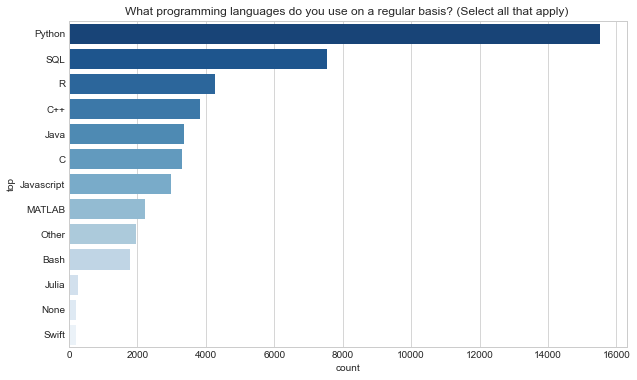

In [116]:
show_multiple_choice_bar_plot_by_qno("Q7")

### 📊 Q2(성별) + Q7(사용 프로그래밍 언어)

In [124]:
Q7_cols = answer.filter(regex = "Q7").describe().loc["top"].tolist()
Q7_cols

['Python',
 'R',
 'SQL',
 'C',
 'C++',
 'Java',
 'Javascript',
 'Julia',
 'Swift',
 'Bash',
 'MATLAB',
 'None',
 'Other']

In [119]:
Q2_Q7 = answer.filter(regex = "Q7|Q2$")
Q2_Q7

,Q2,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
1,Man,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other
2,Man,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Man,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
4,Man,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN
5,Man,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,Woman,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,Man,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,Man,Python,NaN,SQL,C,NaN,Java,Javascript,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
Q2_Q7_count = Q2_Q7.groupby("Q2").count()
Q2_Q7_count

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
Q2,,,,,,,,,,,,,
Man,12530,3299,5940,2552,3063,2641,2487,238,171,1561,1679,149,1634
Nonbinary,41,14,20,8,10,1,6,1,2,10,7,0,7
Prefer not to say,182,48,97,36,43,42,41,5,4,31,28,6,31
Prefer to self-describe,41,8,18,12,13,9,12,2,1,10,6,0,7
Woman,2736,908,1460,707,698,674,449,16,20,164,497,51,266


In [122]:
Q2_Q7_count.columns = Q7_cols
Q2_Q7_count.columns

Index(['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia',
       'Swift', 'Bash', 'MATLAB', 'None', 'Other'],
      dtype='object')

In [123]:
Q2_Q7_count

,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
Q2,,,,,,,,,,,,,
Man,12530,3299,5940,2552,3063,2641,2487,238,171,1561,1679,149,1634
Nonbinary,41,14,20,8,10,1,6,1,2,10,7,0,7
Prefer not to say,182,48,97,36,43,42,41,5,4,31,28,6,31
Prefer to self-describe,41,8,18,12,13,9,12,2,1,10,6,0,7
Woman,2736,908,1460,707,698,674,449,16,20,164,497,51,266


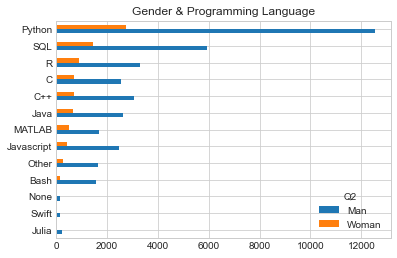

In [125]:
g = Q2_Q7_count.loc[["Man", "Woman"]].T.sort_values("Woman").plot.barh(title = "Gender & Programming Language")

### show_plot_by_qno 정의

In [130]:
#show_countplot_by_qno("Q7")
#show_multiple_choice_bar_plot_by_qno("Q1")
question.index

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=355)

In [134]:
def show_plot_by_qno(qno):
    if qno in question.index:
        show_countplot_by_qno(qno)
    else:
        show_multiple_choice_bar_plot_by_qno(qno)

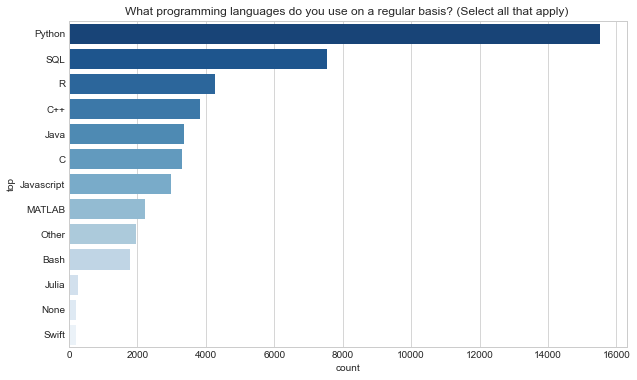

In [138]:
show_plot_by_qno("Q7")

## 📌 질문14

### 사용하는 시각화 라이브러리

In [140]:
get_question_title_by_qno("Q14")

'What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) '

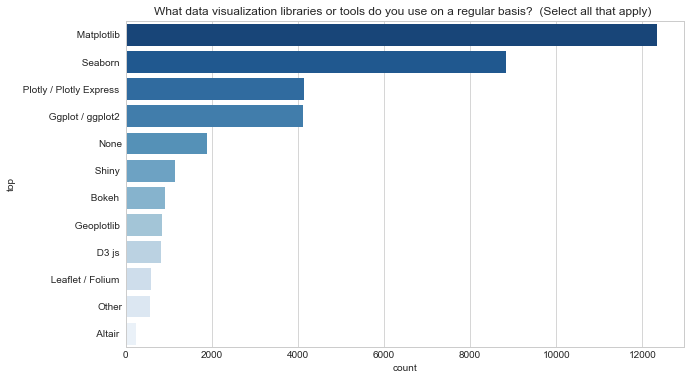

In [141]:
show_plot_by_qno("Q14")

## 📌 질문15

### 머신러닝 공부한 기간

In [142]:
question["Q15"]

'For how many years have you used machine learning methods?'

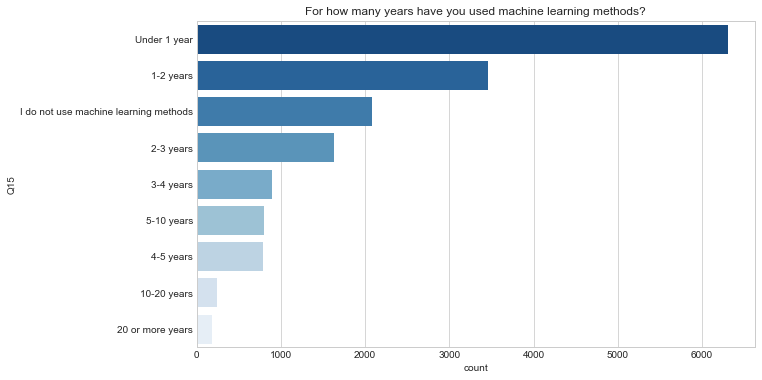

In [143]:
show_plot_by_qno("Q15")

## 📌 질문16

### 주로 사용하는 머신러닝 프레임워크

In [144]:
get_question_title_by_qno("Q16")

'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) '

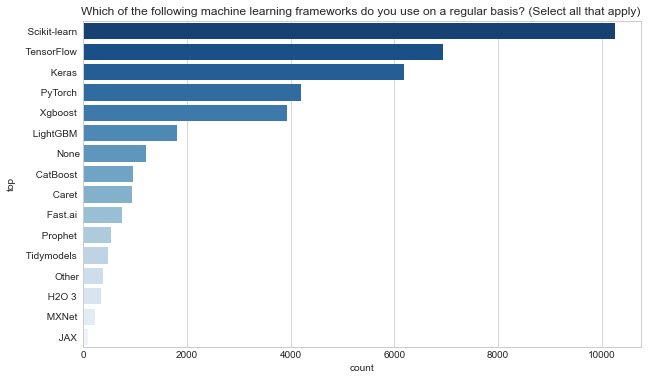

In [145]:
show_plot_by_qno("Q16")

## 📌 질문17

### 주로 사용하는 머신러닝 알고리즘

In [147]:
get_question_title_by_qno("Q17")

'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): '

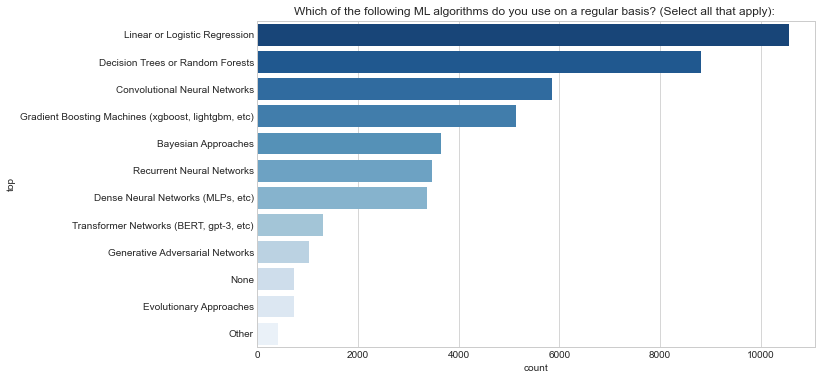

In [148]:
show_plot_by_qno("Q17")

## 📌 질문20

### 현재 직장의 사원수

In [149]:
question["Q20"]

'What is the size of the company where you are employed?'

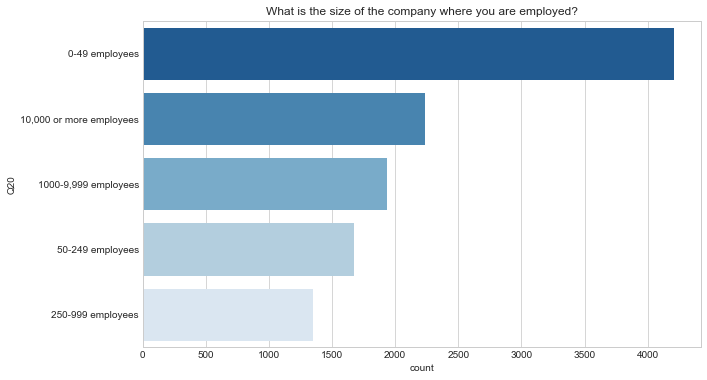

In [150]:
show_plot_by_qno("Q20")

## 📌 질문24

### 현재 연봉 (단위: USD)

In [152]:
question["Q24"]

'What is your current yearly compensation (approximate $USD)?'

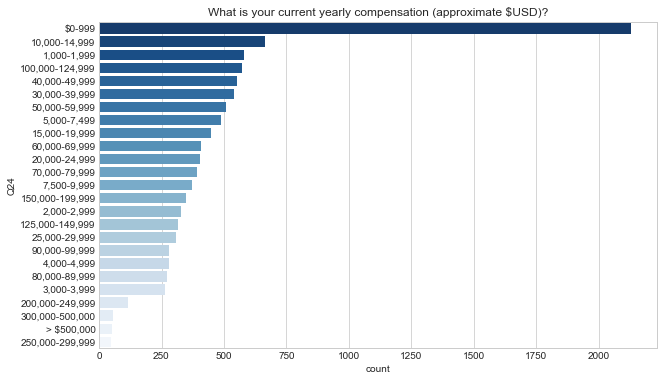

In [153]:
show_plot_by_qno("Q24")

In [155]:
Q24_count = answer["Q24"].value_counts().reset_index()
Q24_count

,index,Q24
0,$0-999,2128
1,"10,000-14,999",665
2,"1,000-1,999",581
3,"100,000-124,999",573
4,"40,000-49,999",552
5,"30,000-39,999",540
6,"50,000-59,999",510
7,"5,000-7,499",488
8,"15,000-19,999",449
9,"60,000-69,999",408


In [156]:
Q24_count.columns = ["range", "count"]
Q24_count.columns

Index(['range', 'count'], dtype='object')

In [157]:
Q24_count

,range,count
0,$0-999,2128
1,"10,000-14,999",665
2,"1,000-1,999",581
3,"100,000-124,999",573
4,"40,000-49,999",552
5,"30,000-39,999",540
6,"50,000-59,999",510
7,"5,000-7,499",488
8,"15,000-19,999",449
9,"60,000-69,999",408


In [159]:
Q24_count["min"] = Q24_count["range"].str.split("-", expand = True)[0]
Q24_count["min"]

0             $0
1         10,000
2          1,000
3        100,000
4         40,000
5         30,000
6         50,000
7          5,000
8         15,000
9         60,000
10        20,000
11        70,000
12         7,500
13       150,000
14         2,000
15       125,000
16        25,000
17        90,000
18         4,000
19        80,000
20         3,000
21       200,000
22       300,000
23    > $500,000
24       250,000
Name: min, dtype: object

In [161]:
Q24_count["max"] = Q24_count["range"].str.split("-", expand = True)[1]
Q24_count["max"]

0         999
1      14,999
2       1,999
3     124,999
4      49,999
5      39,999
6      59,999
7       7,499
8      19,999
9      69,999
10     24,999
11     79,999
12      9,999
13    199,999
14      2,999
15    149,999
16     29,999
17     99,999
18      4,999
19     89,999
20      3,999
21    249,999
22    500,000
23       None
24    299,999
Name: max, dtype: object

In [166]:
Q24_count["min"] = Q24_count["min"].str.replace(",|\$|>", "").astype(int)
Q24_count["min"]

AttributeError: Can only use .str accessor with string values!

In [168]:
Q24_count = Q24_count.sort_values("min")
Q24_count

,range,count,min,max
0,$0-999,2128,0,999
2,"1,000-1,999",581,1000,"1,999"
14,"2,000-2,999",330,2000,"2,999"
20,"3,000-3,999",264,3000,"3,999"
18,"4,000-4,999",279,4000,"4,999"
7,"5,000-7,499",488,5000,"7,499"
12,"7,500-9,999",371,7500,"9,999"
1,"10,000-14,999",665,10000,"14,999"
8,"15,000-19,999",449,15000,"19,999"
10,"20,000-24,999",404,20000,"24,999"


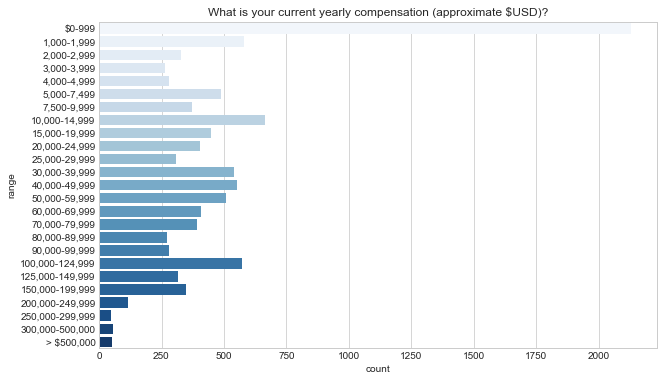

In [170]:
plt.figure(figsize = (10, 6))
g = sns.barplot(data = Q24_count, x = "count", y = "range", palette = "Blues").set_title(get_question_title_by_qno("Q24"))

In [173]:
Q24_cols = Q24_count.range.tolist()
Q24_cols

['$0-999',
 '1,000-1,999',
 '2,000-2,999',
 '3,000-3,999',
 '4,000-4,999',
 '5,000-7,499',
 '7,500-9,999',
 '10,000-14,999',
 '15,000-19,999',
 '20,000-24,999',
 '25,000-29,999',
 '30,000-39,999',
 '40,000-49,999',
 '50,000-59,999',
 '60,000-69,999',
 '70,000-79,999',
 '80,000-89,999',
 '90,000-99,999',
 '100,000-124,999',
 '125,000-149,999',
 '150,000-199,999',
 '200,000-249,999',
 '250,000-299,999',
 '300,000-500,000',
 '> $500,000']

In [179]:
Q3_usa = answer[answer["Q3"].isin(["United States of America"])]
Q3_usa

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,742,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,571,50-54,Man,United States of America,Master’s degree,Software Engineer,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
26,723,25-29,Woman,United States of America,Master’s degree,Student,1-2 years,Python,R,NaN,...,Weights & Biases,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,148,45-49,Man,United States of America,Some college/university study without earning ...,Currently not employed,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20001,653,45-49,Man,United States of America,Bachelor’s degree,Software Engineer,20+ years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20007,487,45-49,Man,United States of America,Doctoral degree,Software Engineer,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20021,238,18-21,Woman,United States of America,Bachelor’s degree,Student,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


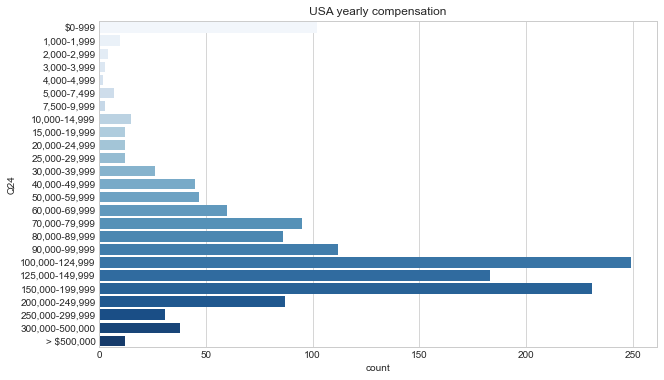

In [180]:
plt.figure(figsize = (10, 6))
g = sns.countplot(data = Q3_usa, y = "Q24", order = Q24_cols, palette = "Blues").set_title("USA yearly compensation")

### ✔한국 연봉 

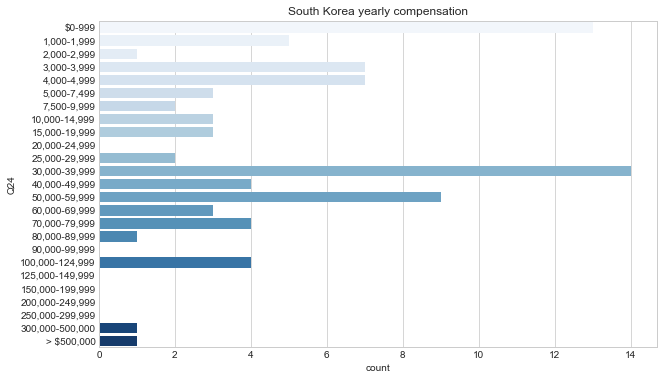

In [182]:
Q3_SKorea = answer[answer["Q3"].isin(["South Korea"])]
plt.figure(figsize = (10, 6))
g = sns.countplot(data = Q3_SKorea, y = "Q24", order = Q24_cols, palette = "Blues").set_title("South Korea yearly compensation")

## 📌 질문25

### 지난 5년간 머신러닝 / 클라우드 컴퓨팅 서비스에 지불한 대략적인 금액

In [183]:
question["Q25"]

'Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?'

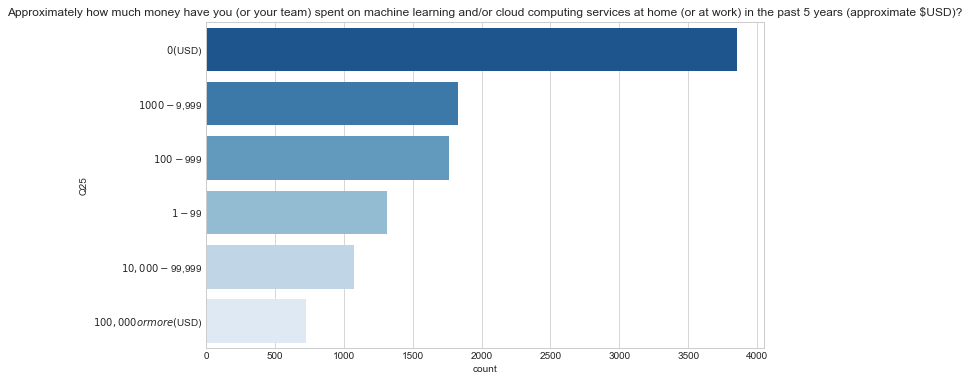

In [184]:
show_plot_by_qno("Q25")